# Polarization reconstruction with neutrinos

### Oct 21, 2020

## Code

In [21]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")

In [22]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


## Gather data

In [23]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes"):#Loop over desired directory
        if (filename.startswith("pol_quant_noiseless")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu = pd.concat(appended_data)     
recoNu["theta_pol"] = np.degrees(np.arccos(abs(recoNu.pol_z)))
recoNu["theta_pol"] = recoNu["theta_pol"]
recoNu = recoNu.loc[recoNu.rmsV>10]
recoNu = recoNu.loc[recoNu.rmsV<1400]
recoNu = recoNu.loc[recoNu.rmsH>10]
recoNu = recoNu.loc[recoNu.rmsH<1400]
# recoNu = recoNu.loc[recoNu["theta_pol"]<=90]
# recoNu = recoNu.loc[recoNu["AngStokes"]>1]



In [56]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes"):#Loop over desired directory
        if (filename.startswith("pol_quant_1")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu_noise = pd.concat(appended_data)     
recoNu_noise["theta_pol"] = np.degrees(np.arccos(abs(recoNu_noise.pol_z)))
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsV>200]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsV<1400]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsH>200]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsH<1400]
# recoNu_noise = recoNu_noise.loc[recoNu_noise["AngStokes"]>1]


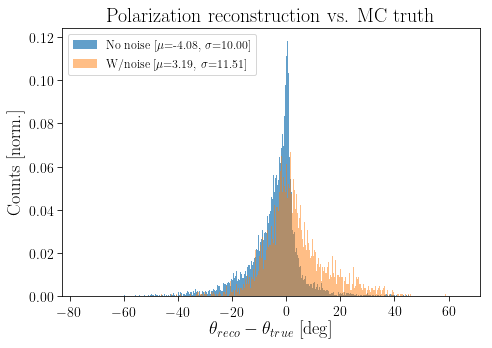

In [57]:
plt.figure(figsize=(7,5))
# plt.hist(recoNu.AngStokes-np.degrees(np.arccos(abs(recoNu.pol_z))), bins=100, density=False, alpha=1);
delta_std = (recoNu.AngRatio-recoNu.theta_pol).std()
delta_mean = (recoNu.AngRatio-recoNu.theta_pol).mean()
plt.hist(recoNu.AngRatio-recoNu.theta_pol, bins=500, density=True, alpha=0.7,label = "No noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

delta_std = (recoNu_noise.AngRatio-recoNu_noise.theta_pol).std()
delta_mean = (recoNu_noise.AngRatio-recoNu_noise.theta_pol).mean()
plt.hist(recoNu_noise.AngRatio-recoNu_noise.theta_pol, bins=500, density=True, alpha=0.5,label = "W/noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

plt.xlabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.xlabel("$\\theta$")
plt.ylabel('Counts [norm.]')
plt.title("Polarization reconstruction vs. MC truth")
# plt.yscale("log")
# mplcyberpunk.add_glow_effects()
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim.png',dpi=150)

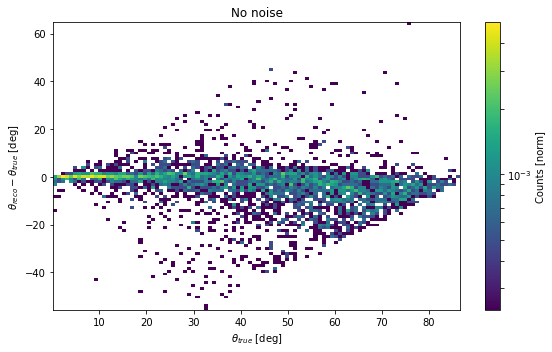

In [4]:
plt.figure(figsize=(8,5))
plt.hist2d(90-recoNu.theta_pol,recoNu.AngRatio-recoNu.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.hist2d(90-recoNu_noise.AngStokes,recoNu_noise.AngStokes-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("No noise")
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noiseless.pdf')

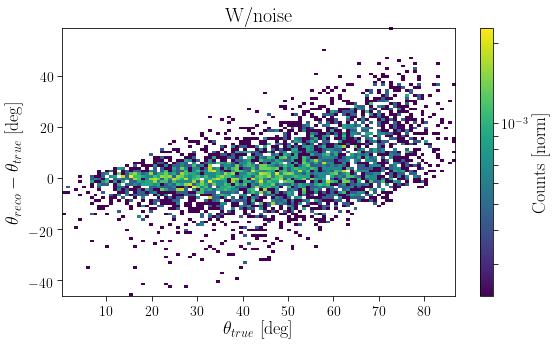

In [58]:
plt.figure(figsize=(8,5))
plt.hist2d(90-recoNu_noise.theta_pol,recoNu_noise.AngRatio-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("W/noise")

# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noise.pdf')

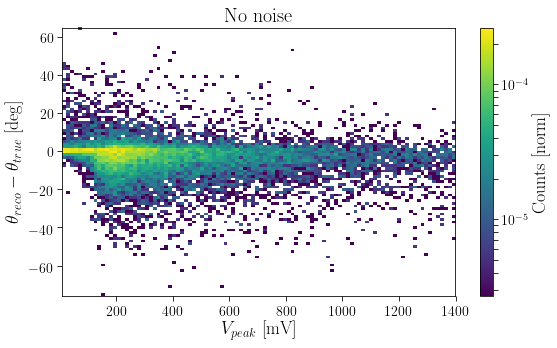

In [59]:
plt.figure(figsize=(8,5))
plt.hist2d(recoNu.rmsV,recoNu.AngRatio-recoNu.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.hist2d(90-recoNu_noise.AngStokes,recoNu_noise.AngStokes-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("No noise")
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
# plt.xlabel("$\\theta_{true}$ [deg]")
plt.xlabel("$V_{peak}$ [mV]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsVpeak_AraSim_noiseless.pdf')

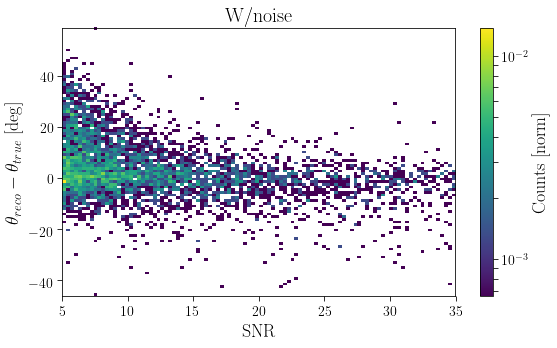

In [60]:
plt.figure(figsize=(8,5))
plt.hist2d(recoNu_noise.rmsV/40,recoNu_noise.AngRatio-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("W/noise")

# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("SNR")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsRMS_AraSim_noise.pdf')

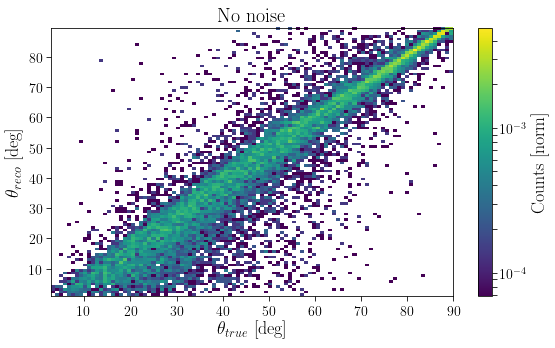

In [39]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.hist2d(recoNu.theta_pol,90-recoNu.AngStokes, bins=100, normed=True, norm=mpl.colors.LogNorm());
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}$ [deg]")
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D.png', dpi=200)

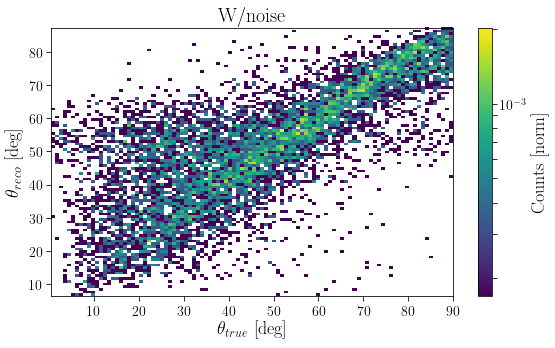

In [41]:
plt.figure(figsize=(8,5))
plt.title("W/noise")
plt.hist2d(recoNu_noise.theta_pol,90-recoNu_noise.AngStokes, bins=100, normed=True, norm=mpl.colors.LogNorm());
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}$ [deg]")
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D_noise.png', dpi=200)

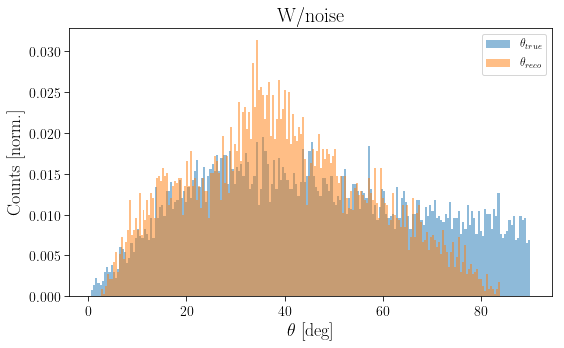

In [43]:
plt.figure(figsize=(8,5))
plt.title("W/noise")
plt.ylabel('Counts [norm.]')
plt.hist(recoNu_noise.theta_pol, bins=200, alpha=0.5, density=True,  label="$\\theta_{true}$");
plt.hist(recoNu_noise.AngStokes, bins=200, alpha=0.5, density=True, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/theta_dist_noise.pdf')

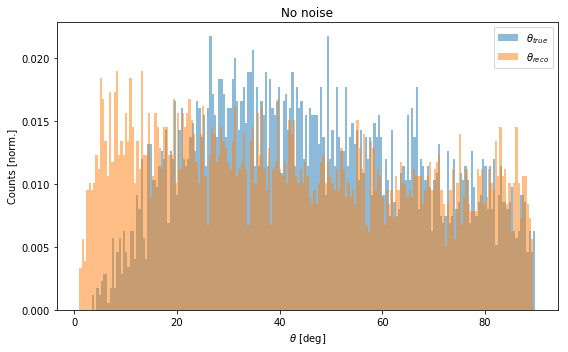

In [14]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.ylabel('Counts [norm.]')
plt.hist(recoNu.theta_pol, bins=200, density=True, alpha=0.5,  label="$\\theta_{true}$");
plt.hist(90-recoNu.AngStokes, bins=200, density=True, alpha=0.5, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/theta_dist_noiseless.pdf')

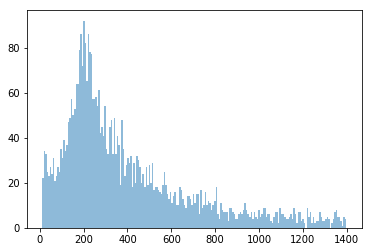

In [15]:
plt.hist(recoNu.rmsV, bins=200, density=False, alpha=0.5,  label="$\\theta_{true}$");


In [223]:
recoNu

,EvNum,theta_reco,phi_reco,pol_x,pol_y,pol_z,AngStokes,AngRatio,rms,rmsV,rmsH,theta_pol
1,251,180.0,0.0,-0.023318,0.539969,0.841362,47.688974,47.688974,1182.256783,NaN,NaN,32.715761
3,297,180.0,0.0,0.809240,-0.143524,0.569676,50.794920,50.794920,243.866564,NaN,NaN,55.272346
5,409,180.0,0.0,-0.538710,0.033709,0.841817,33.747908,33.747908,268.455393,NaN,NaN,32.667556
6,416,180.0,0.0,-0.846307,0.477779,-0.235567,84.527548,84.527548,416.375014,NaN,NaN,76.374928
7,551,180.0,0.0,-0.097939,-0.849127,0.519029,66.989245,66.989245,1069.822670,NaN,NaN,58.732852
...,...,...,...,...,...,...,...,...,...,...,...,...
3717,219276,180.0,0.0,0.166727,0.344768,-0.923762,19.126394,19.126394,272.669163,NaN,NaN,22.517517
3722,219528,180.0,0.0,-0.307588,0.430837,0.848392,68.643763,68.643763,672.941919,NaN,NaN,31.962818
3723,219548,180.0,0.0,0.773570,-0.544943,0.323462,81.898522,81.898522,236.637116,NaN,NaN,71.127604
3724,219597,180.0,0.0,-0.060371,0.993053,0.101002,88.725657,88.725657,820.391060,NaN,NaN,84.203135


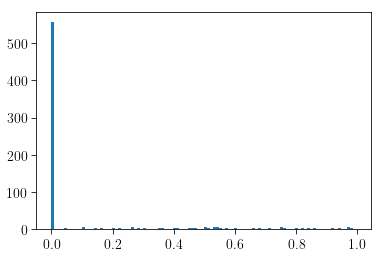

In [148]:
plt.hist(recoNu.loc[recoNu.AngStokes<1].AngStokes, bins=100);

In [186]:
recoNu=recoNu.loc[recoNu.rms.isna()==False]
recoNu = recoNu.loc[recoNu.rms<1500]

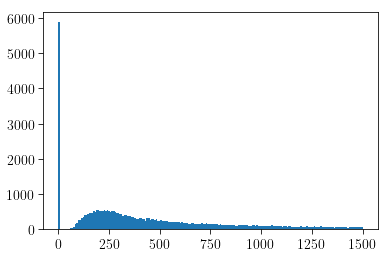

In [189]:
plt.hist(recoNu.rms, bins=200);

In [9]:
array = np.linspace(0,100,101)

In [38]:
data = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/AraSim_analysis/TrigFiles/triggersSNR_1E19_10.pkl")


In [39]:
data.head()

,Energy,SNR,Channel
0,19.0,8.834685,0
1,19.0,5.325895,0
2,19.0,4.434595,0
3,19.0,6.894959,1
4,19.0,13.362823,5


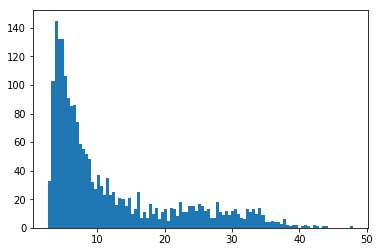

In [40]:
plt.hist(data.SNR, bins=100);

In [41]:
len(data)

2086

In [34]:
np.degrees(np.arccos(abs(-0.033)))

88.10889593471583

In [35]:
np.degrees(np.arccos(abs(-0.026)))

88.51014184314606

In [13]:
f=19.5
print("%0.1f"%f)

19.5
